### W51-E B6 central field imaging test

Aim: Compare gridders.

In [76]:
import os
from casatasks import tclean, immath, imregrid
from casatools import msmetadata, image
msmd = ms = msmetadata()
ia = image()

In [2]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy import wcs

In [3]:
import reproject

In [109]:
%matplotlib inline
import numpy as np
from astropy import units as u
import pylab as pl
pl.rcParams['figure.figsize'] = (16,8)
pl.style.use('dark_background')
pl.rcParams['image.origin'] = 'lower'
import sys
import glob
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/reduction/')
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')
import imp, diagnostic_images
imp.reload(diagnostic_images)
from diagnostic_images import load_images, show
from spectral_cube import SpectralCube
import spectral_cube

In [34]:
import warnings
import spectral_cube
warnings.simplefilter('ignore', spectral_cube.utils.BeamWarning)
warnings.simplefilter('ignore', spectral_cube.utils.StokesWarning)
warnings.simplefilter('ignore', spectral_cube.utils.PossiblySlowWarning)
warnings.simplefilter('ignore', spectral_cube.utils.WCSWarning)

In [5]:
import os
os.chdir("/orange/adamginsburg/ALMA_IMF/2017.1.01355.L")

In [6]:
msname = "/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_selfcal.ms"

In [7]:
msmd.open(msname)
print(msmd.nobservations())
for ii in range(msmd.nobservations()):
    print(f"{ii}: {msmd.antennaids(obsid=ii)}")
print(msmd.scannumbers(2), msmd.scannumbers(3), msmd.scannumbers(12))
print(msmd.fieldsforscans(msmd.scannumbers(obsid=2)))
print(msmd.fieldsforscans(msmd.scannumbers(obsid=3)))
print(msmd.fieldsforscans(msmd.scannumbers(obsid=12)))
fields_12m = msmd.fieldsforscans(msmd.scannumbers(obsid=12))
msmd.close()

13
0: []
1: []
2: [11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54]
3: [11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54]
4: []
5: []
6: []
7: []
8: []
9: []
10: []
11: []
12: [11 12 13 14 19 23 30 34 35 39 40 41 43 44 46 47 48 49 51 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82]
[67 68 70 72 74 75 78 79 81 83 85 86 89] [ 90  91  93  95  97  98 101 102 104 106 108 109 112] [297 298 300 302 304 305 308 309 311 313 315]
[11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37]
[11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37]
[11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37]


True

[26, 27]


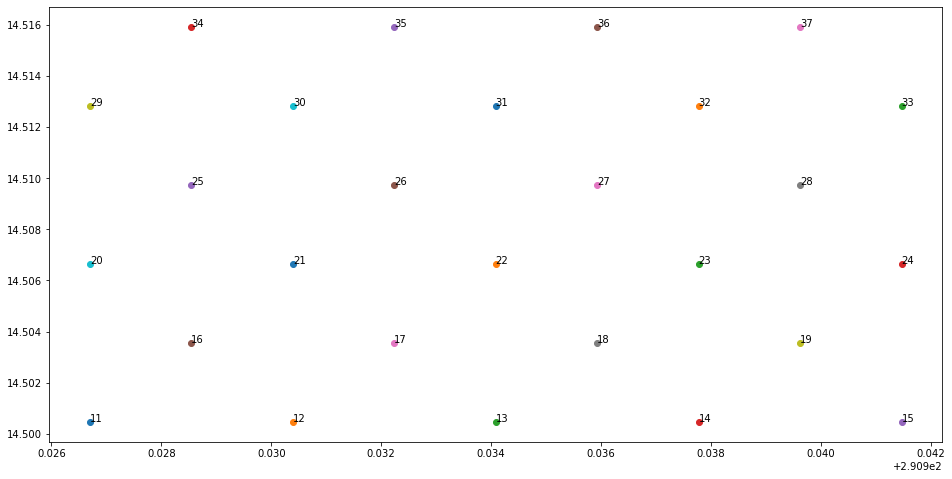

In [8]:
w51e2 = SkyCoord('19:23:43.939 +14:30:34.472', frame='fk5', unit=(u.hour, u.deg))
ax = pl.gca()
centerfield = []
msmd.open(msname)
for fid in msmd.fieldsforname('W51-E'):
    if fid in fields_12m:
        crd = msmd.phasecenter(fid)
        field_coord = SkyCoord(crd['m0']['value'], crd['m1']['value'],
                               frame=crd['refer'].lower(),
                               unit=(crd['m0']['unit'], crd['m1']['unit']))
        sep = w51e2.separation(field_coord)
        ax.scatter(field_coord.ra.deg, field_coord.dec.deg)
        ax.annotate(str(fid), (field_coord.ra.deg, field_coord.dec.deg))
        #print(f"{fid} is separated by {sep.to(u.arcsec):0.1f}")
        #print(f'circle({field_coord.ra.deg}, {field_coord.dec.deg}, 15")')
        if sep < 10*u.arcsec:
            centerfield.append(fid)
        
msmd.close()
print(centerfield)
centerfield=26

In [9]:
msmd.open(msname)
antennae = ",".join([x for x in msmd.antennanames() if 'CM' not in x])
print(antennae)
msmd.close()

DA41,DA42,DA43,DA44,DA45,DA46,DA47,DA48,DA49,DA50,DA51,DA52,DA53,DA54,DA55,DA56,DA57,DA58,DA59,DA60,DA61,DA62,DA63,DA64,DV01,DV02,DV03,DV04,DV05,DV06,DV07,DV09,DV10,DV11,DV14,DV15,DV16,DV17,DV20,DV22,DV23,DV24,DV25,PM03,DA45,DA46,DA48,DA50,DA51,DA52,DA54,DA55,DA56,DA58,DA59,DA61,DA62,DA63,DA65,DV02,DV03,DV04,DV08,DV12,DV13,DV14,DV19,DV21,DV22,DV24,DV25


True

In [10]:
releasepath = "/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/December2020Release/W51-E/B6/cleanest/"


In [11]:
finaliter = fits.open(f"{releasepath}/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits")
ww = wcs.WCS(finaliter[0].header)
print(ww.celestial.pixel_scale_matrix*3600)

[[-0.06  0.  ]
 [ 0.    0.06]]


In [65]:
releasepath = 'imaging_results' # not reeally a release path...
finalmodelname = [f"{releasepath}/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.model.tt0",
                  f"{releasepath}/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.model.tt1"]
finalpbname = f"{releasepath}/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.pb.tt0"
try:
    finalmodel_pbcor = immath(imagename=[finalmodelname[1], finalpbname], expr='IM0/IM1', outfile=finalmodelname[1]+".pbcor")
except Exception as ex:
    print(ex)
try:
    finalmodel_pbcor = immath(imagename=[finalmodelname[0], finalpbname], expr='IM0/IM1', outfile=finalmodelname[0]+".pbcor")
except Exception as ex:
    print(ex)


Output file imaging_results/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.model.tt1.pbcor exists. immath can not proceed, please remove it or change the output file name.
Output file imaging_results/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.model.tt0.pbcor exists. immath can not proceed, please remove it or change the output file name.


In [47]:
mkdir imaging_results/W51-E_StandardGridderTests/

In [48]:
stdgrdpath = "imaging_results/W51-E_StandardGridderTests/"

In [121]:
for field in fields_12m:
    imagename_standard = f"{stdgrdpath}/W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field{field}"
    if os.path.exists(imagename_standard+".image.tt0"):
        continue
    tclean(vis=msname,
           selectdata=True,
           field=str(field),
           spw="",
           timerange="",
           uvrange="",
           antenna=antennae,
           scan="",
           observation="",
           intent="",
           datacolumn="corrected",
           imagename=imagename_standard,
           imsize=[1200, 1200],
           #phasecenter="ICRS 290.9332327deg 14.50817819deg",
           cell=['0.06arcsec', '0.06arcsec'],
           stokes="I",projection="SIN",
           nchan=-1,start="",width="",outframe="LSRK",veltype="radio",
           gridder="standard",
           deconvolver="mtmfs",
           scales=[0, 3, 9],
           nterms=2,
           smallscalebias=0.6,
           restoration=True,
           pbcor=True,
           weighting="briggs",
           robust=0,
           niter=0,
           verbose=False,
           restart=True,
           savemodel="none",
           calcres=True,
           calcpsf=True,
           parallel=False)
    os.system(f"rm -r {imagename_standard}.model.*")
    os.system(f"rm -r {imagename_standard}.residual.*")
    # immath(imagename='', mode='evalexpr', outfile='immath_results.im', expr='IM0', varnames='', sigma='0.0mJy/beam', polithresh='', mask='', region='', box='', chans='', stokes='', stretch=False, imagemd='', prec='float')
    imregrid(imagename=finalmodelname[0]+".pbcor", template=imagename_standard+".pb.tt0", output=imagename_standard+"_finalmodel_proj_std.model.tt0.pbcor")
    imregrid(imagename=finalmodelname[1]+".pbcor", template=imagename_standard+".pb.tt0", output=imagename_standard+"_finalmodel_proj_std.model.tt1.pbcor")
    immath(imagename=[imagename_standard+".pb.tt0", imagename_standard+"_finalmodel_proj_std.model.tt0.pbcor", ],           
           expr="IM0 * IM1",
           outfile=imagename+".model.tt0",
           imagemd=imagename_standard+".image.tt0")
    immath(imagename=[imagename_standard+".pb.tt0", imagename_standard+"_finalmodel_proj_std.model.tt1.pbcor", ],
           expr="IM0 * IM1",
           outfile=imagename+".model.tt1",
           imagemd=imagename_standard+".image.tt1")

    os.system(f"rm -r {imagename_standard}.image.*")


    tclean(vis=msname,
           selectdata=True,
           field=str(field),
           spw="",
           timerange="",
           uvrange="",
           antenna=antennae,
           scan="",
           observation="",
           intent="",
           datacolumn="corrected",
           imagename=imagename_standard,
           imsize=[1200, 1200],
           #phasecenter="ICRS 290.9332327deg 14.50817819deg",
           cell=['0.06arcsec', '0.06arcsec'],
           stokes="I",projection="SIN",
           nchan=-1,start="",width="",outframe="LSRK",veltype="radio",
           gridder="standard",
           deconvolver="mtmfs",
           scales=[0, 3, 9],
           nterms=2,
           smallscalebias=0.6,
           restoration=True,
           pbcor=True,
           weighting="briggs",
           robust=0,
           niter=0,
           verbose=False,
           restart=True,
           savemodel="none",
           calcres=True,
           calcpsf=True,
           parallel=False)

In [102]:
field=11

In [103]:
imagename_standard = f"{stdgrdpath}/W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field{field}"

In [113]:
ls -d $imagename_standard*

imaging_results/W51-E_StandardGridderTests//W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field11.alpha/
imaging_results/W51-E_StandardGridderTests//W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field11.alpha.error/
imaging_results/W51-E_StandardGridderTests//W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field11.alpha.pbcor/
imaging_results/W51-E_StandardGridderTests//W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field11_finalmodel_proj_std.model.tt0.pbcor/
imaging_results/W51-E_StandardGridderTests//W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field11_finalmodel_proj_std.model.tt1.pbcor/
imaging_results/W51-E_StandardGridderTests//W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field11.image

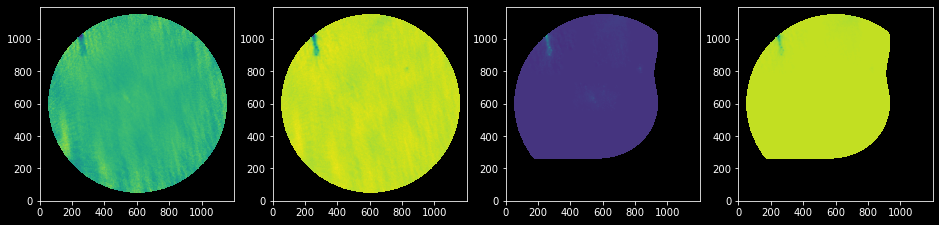

In [117]:
fid = 11
imagename_standard = f"{stdgrdpath}/W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field{fid}"

img = SpectralCube.read(imagename_standard+".image.tt0.pbcor", format='casa_image')    
model = SpectralCube.read(imagename_standard+".model.tt0", format='casa_image')
repmod = SpectralCube.read('imaging_results/W51-E_StandardGridderTests//W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field11_finalmodel_proj_std.model.tt0.pbcor', format='casa_image')
residual = SpectralCube.read(imagename_standard+".residual.tt0", format='casa_image')
pb = SpectralCube.read(imagename_standard+".pb.tt0", format='casa_image')

pl.subplot(1,4,1).imshow(img[0].value)
pl.subplot(1,4,2).imshow(residual[0].value)
pl.subplot(1,4,3).imshow(model[0].value)
pl.subplot(1,4,4).imshow(model[0].value - repmod[0].value)

In [98]:
finaliterim = SpectralCube.read(f"{releasepath}/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits")

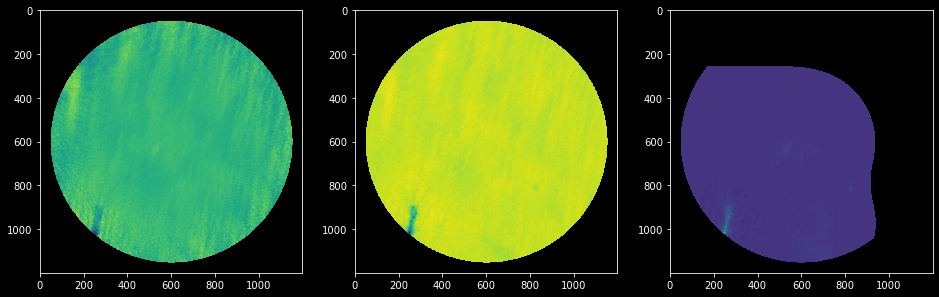

In [108]:
imagename_standard = f"{stdgrdpath}/W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field{fid}"

img = SpectralCube.read(imagename_standard+".image.tt0.pbcor", format='casa_image')    
model = SpectralCube.read(imagename_standard+".model.tt0", format='casa_image')    
residual = SpectralCube.read(imagename_standard+".residual.tt0", format='casa_image')    

pl.subplot(1,3,1).imshow(img[0].value)
pl.subplot(1,3,2).imshow(residual[0].value)
pl.subplot(1,3,3).imshow(model[0].value)

diff = {}
for field in fields_12m:
    imagename_standard = f"{stdgrdpath}/W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field{field}"

    img = SpectralCube.read(imagename_standard+".image.tt0.pbcor", format='casa_image')

    reprj = finaliterim[0].reproject(img[0].header)
    diff[field] = (reprj.value-img[0].value)

/orange/adamginsburg/miniconda3/envs/casa61_py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


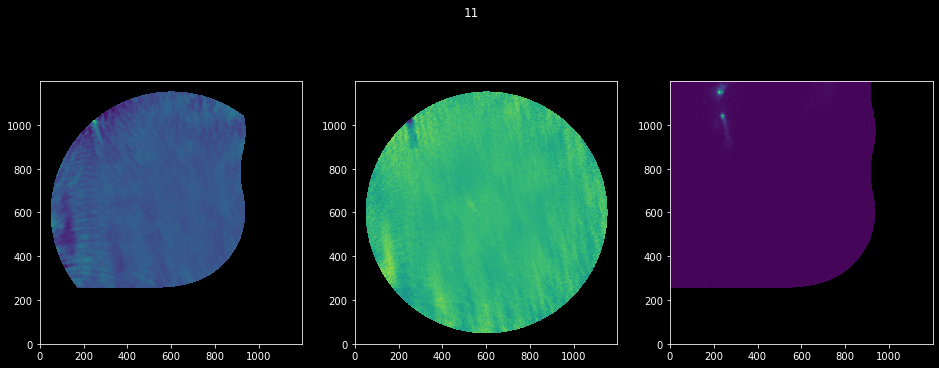

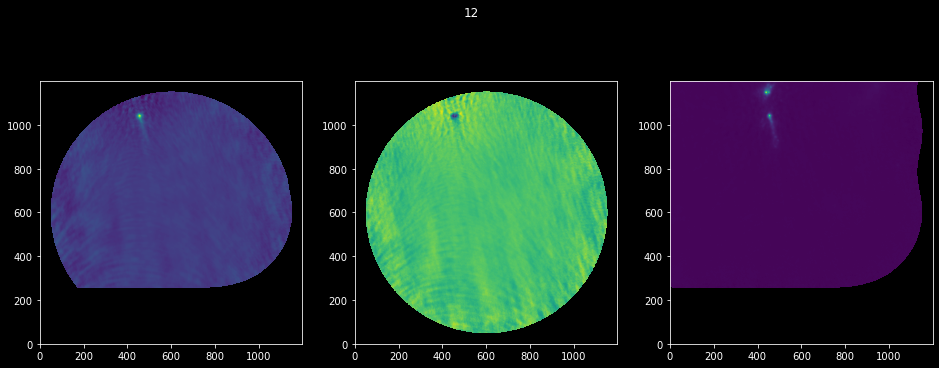

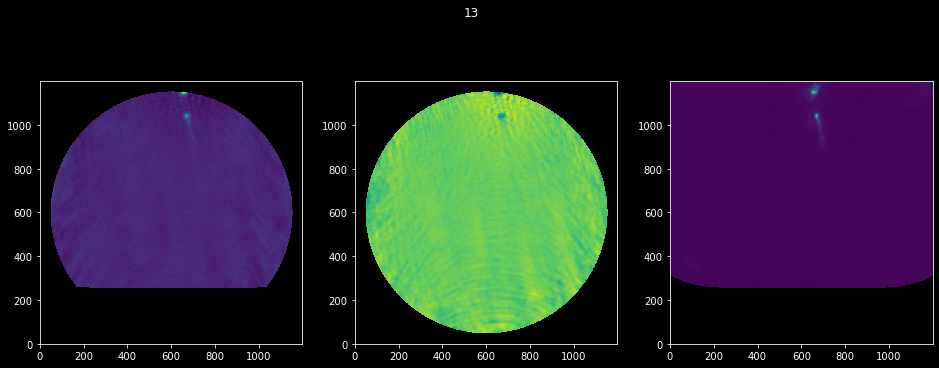

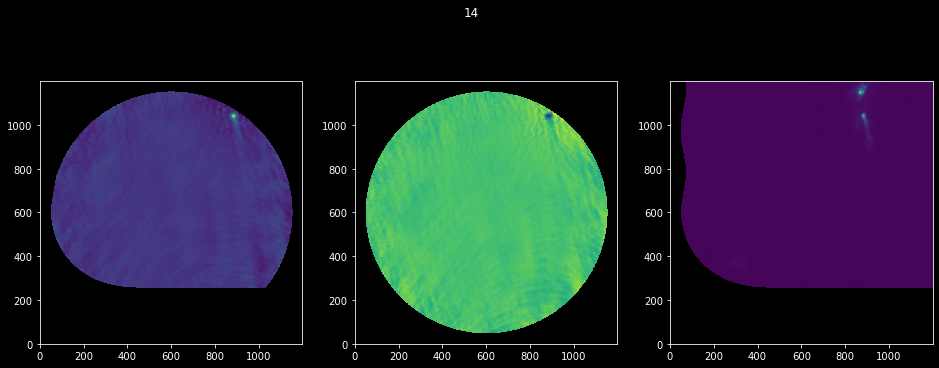

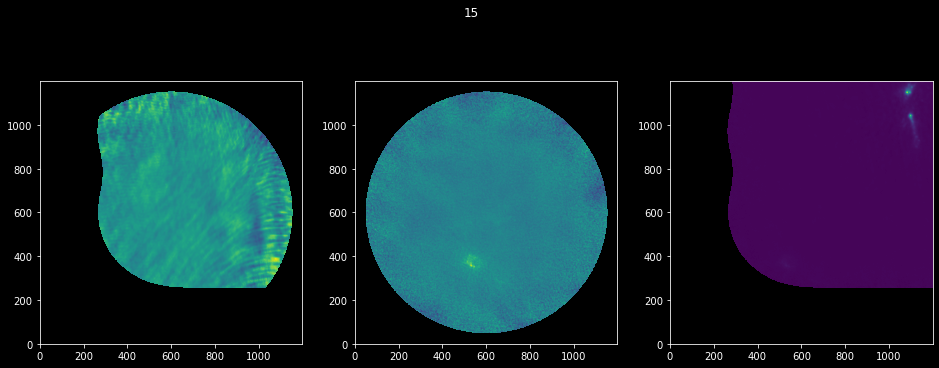

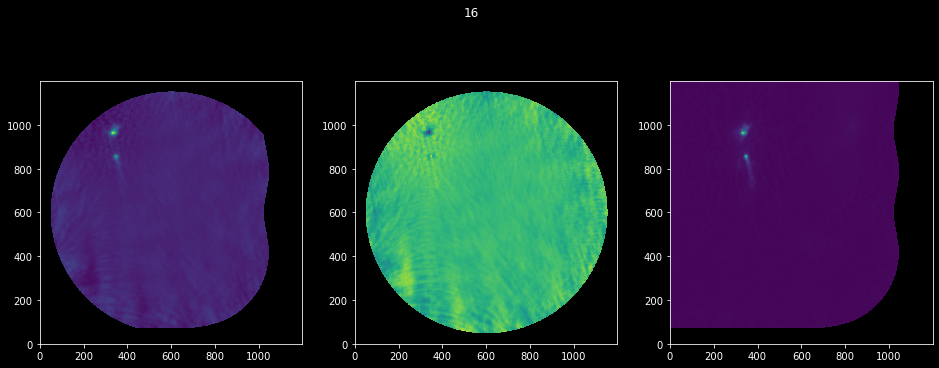

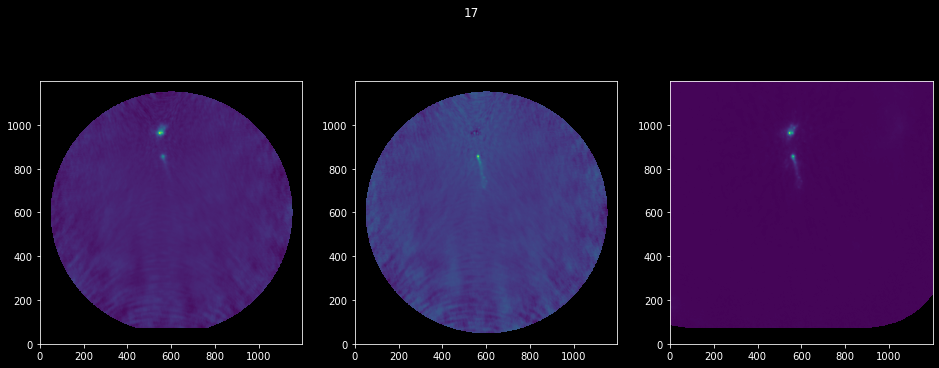

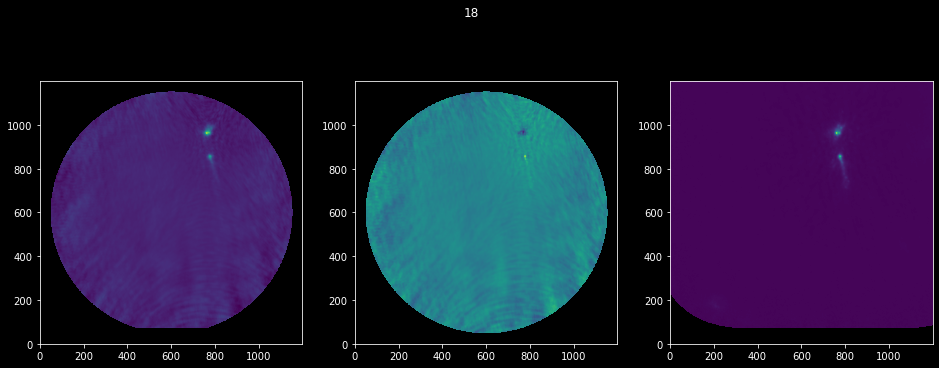

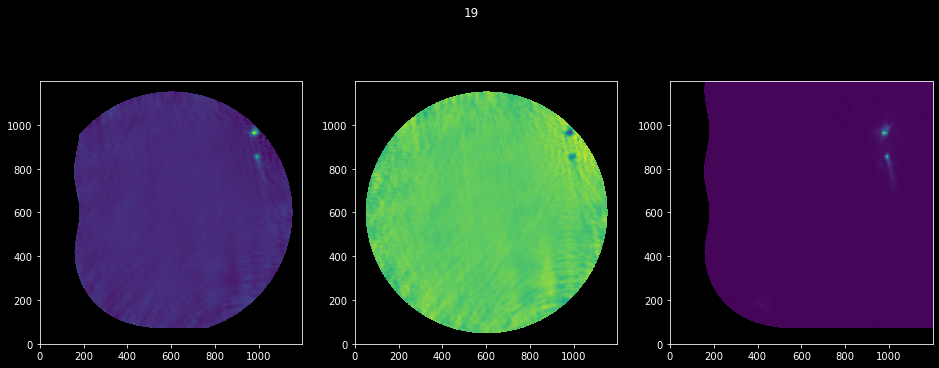

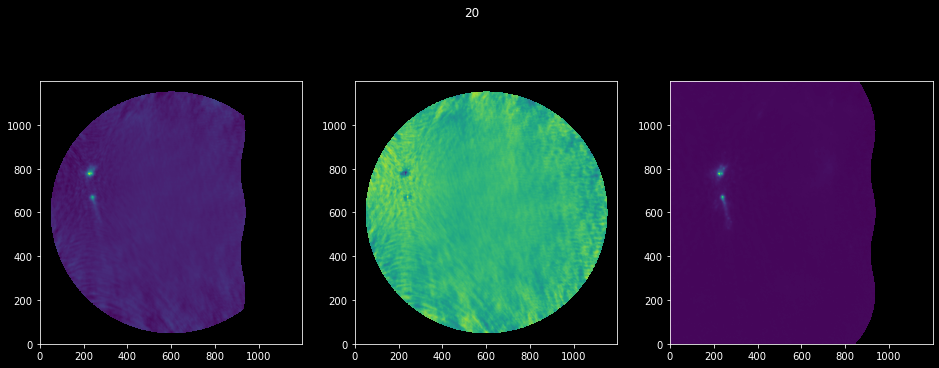

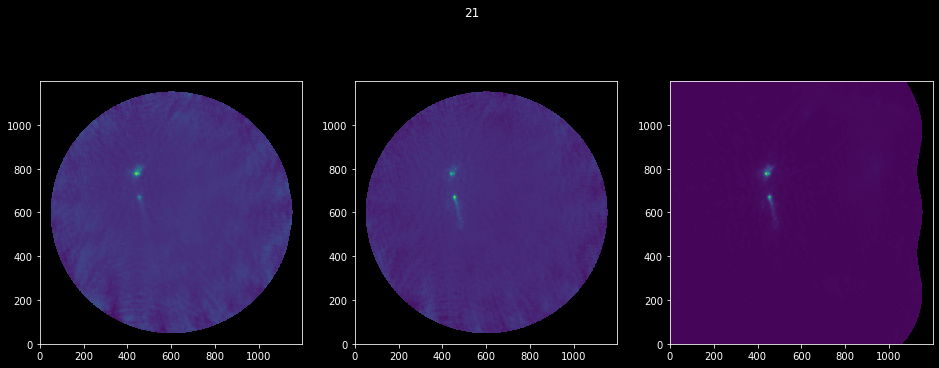

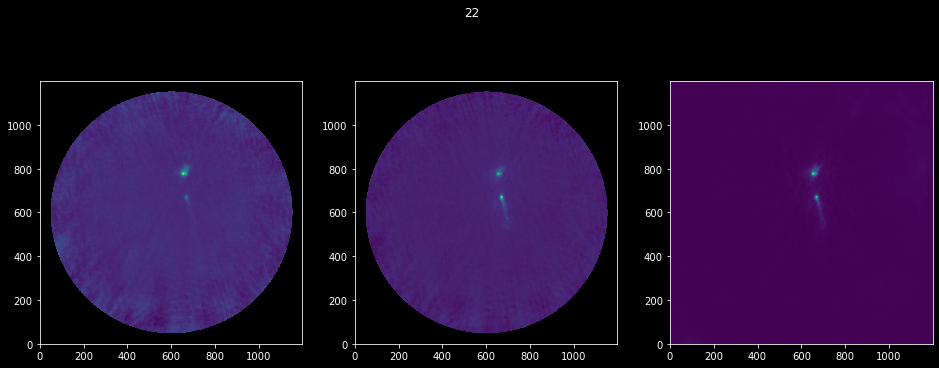

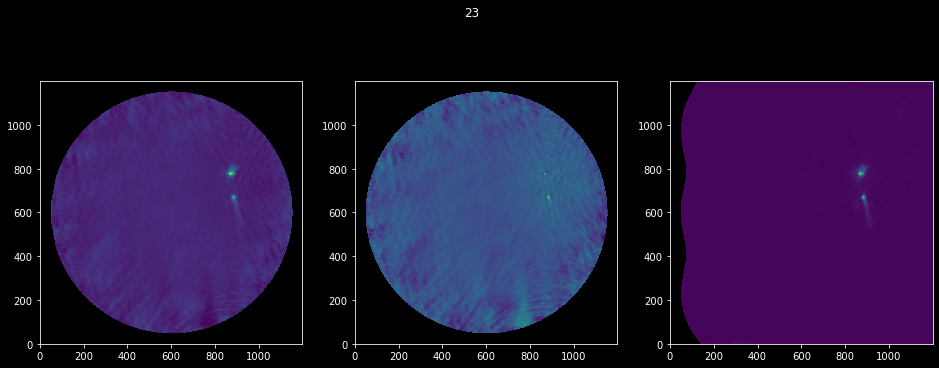

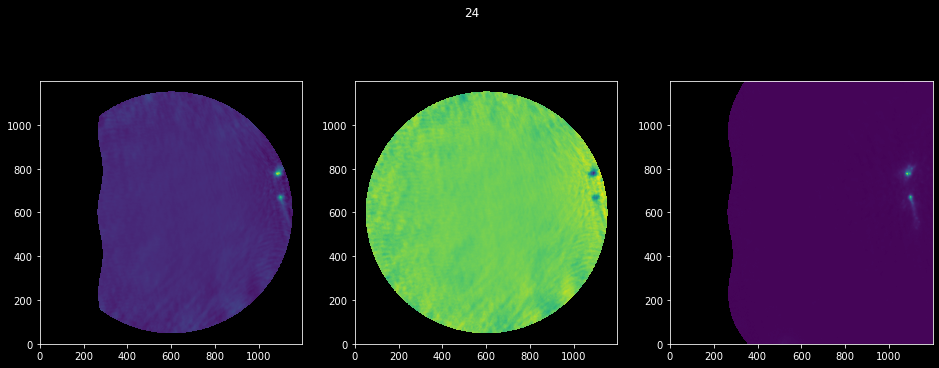

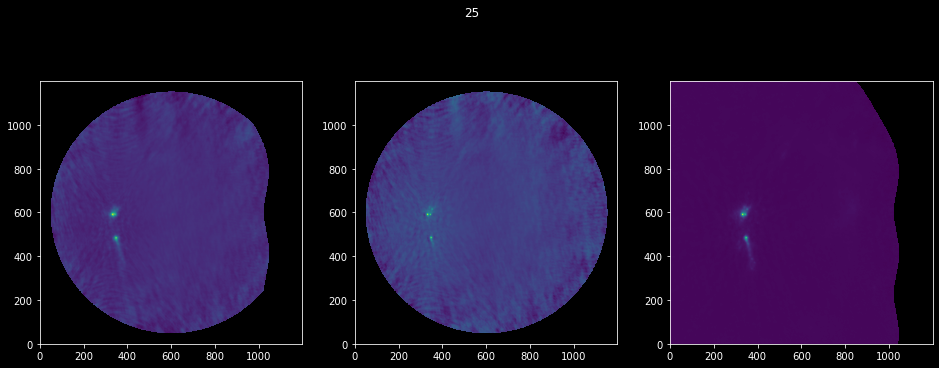

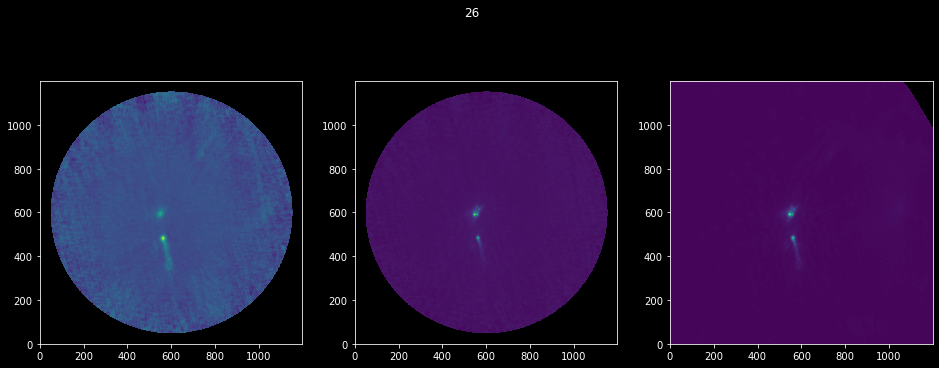

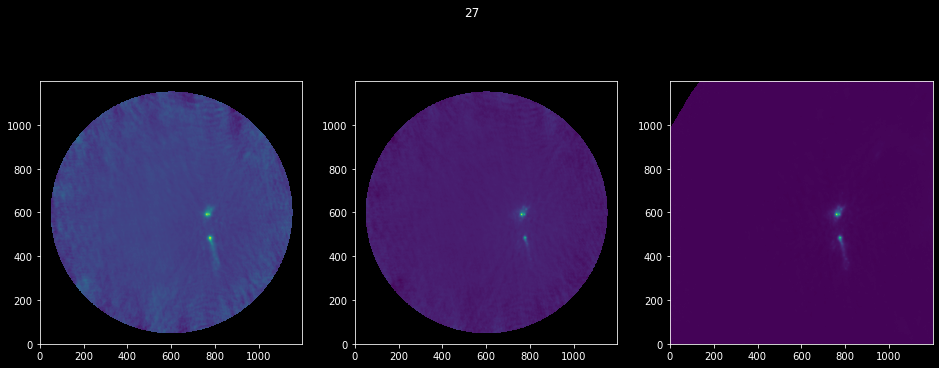

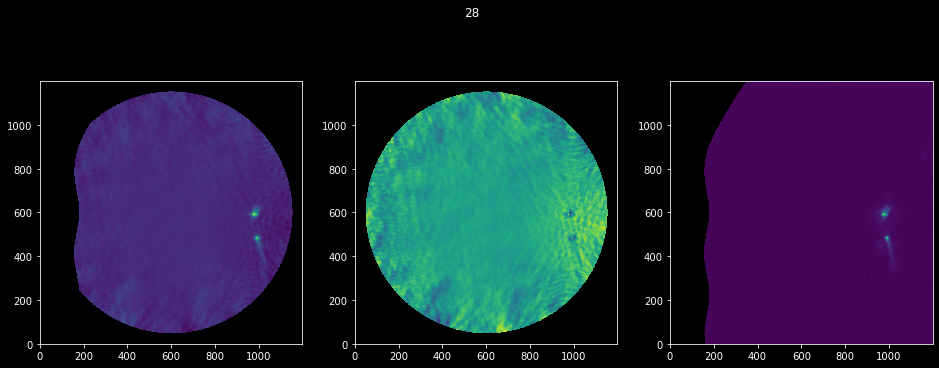

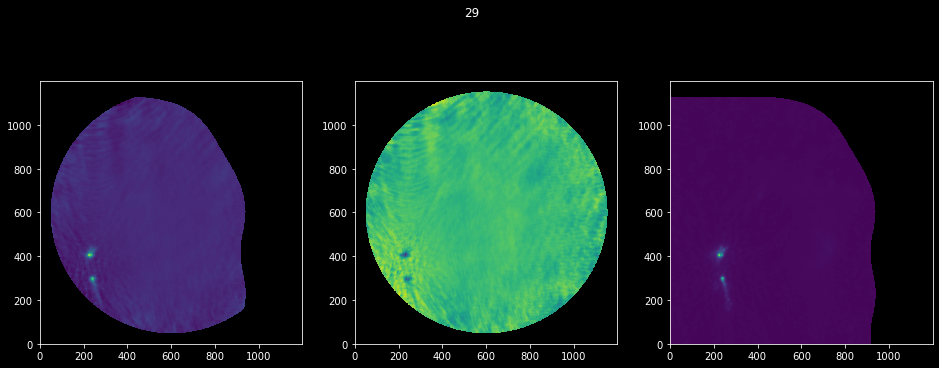

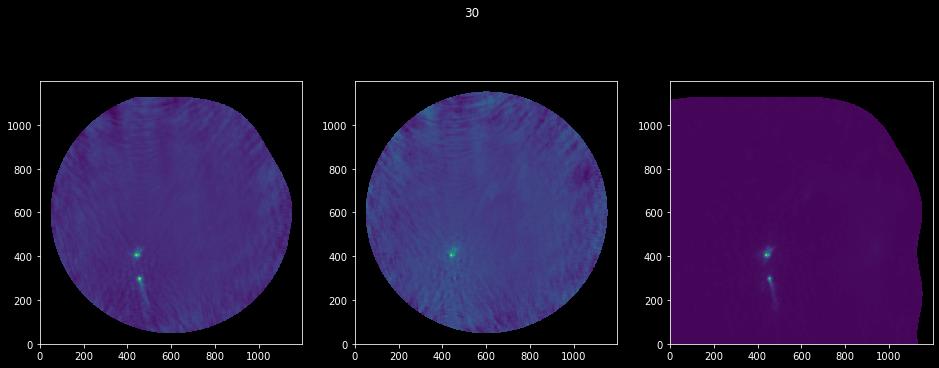

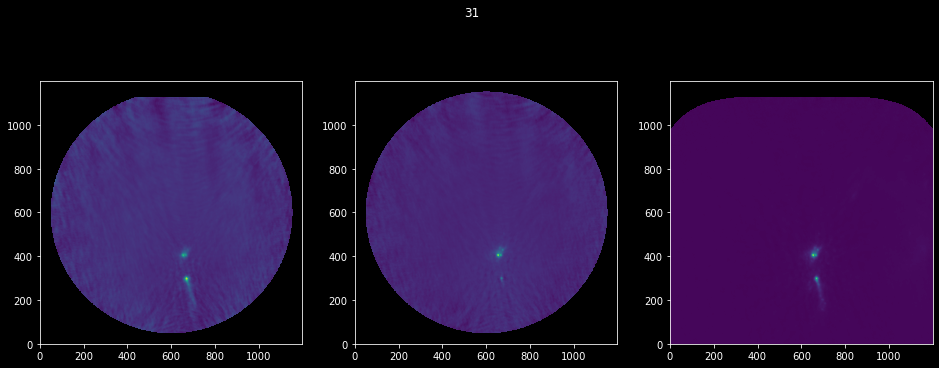

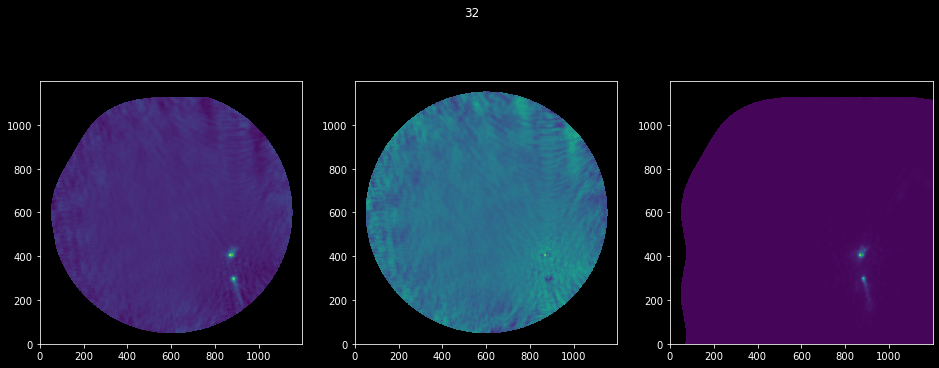

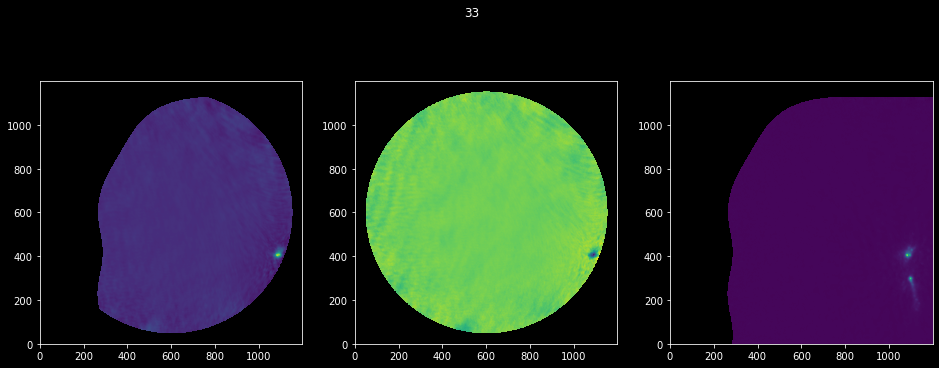

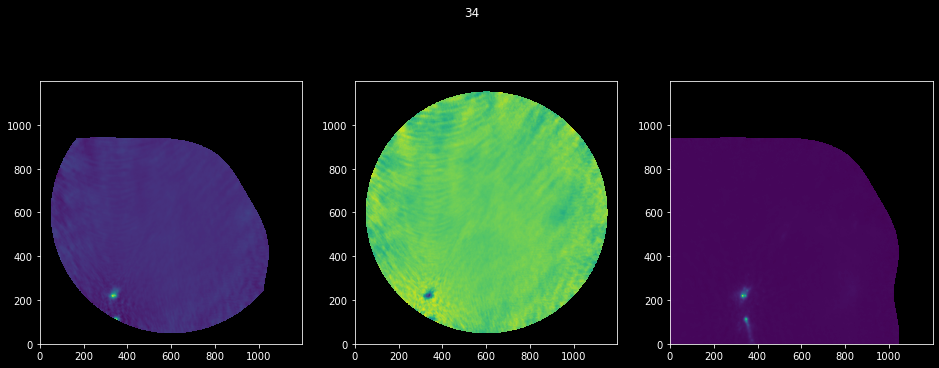

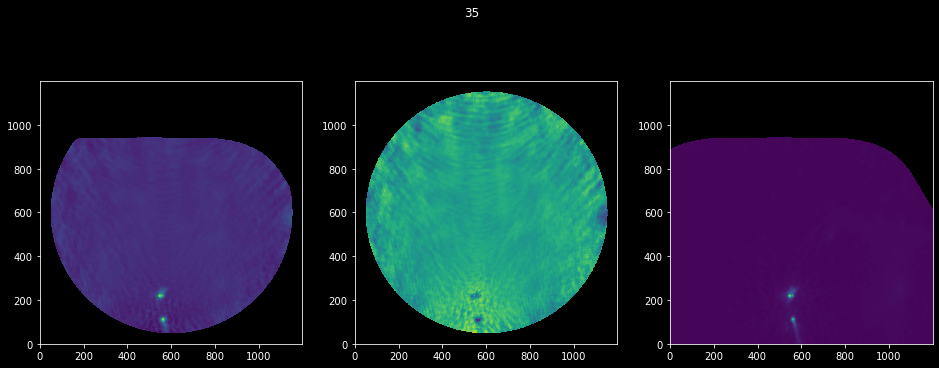

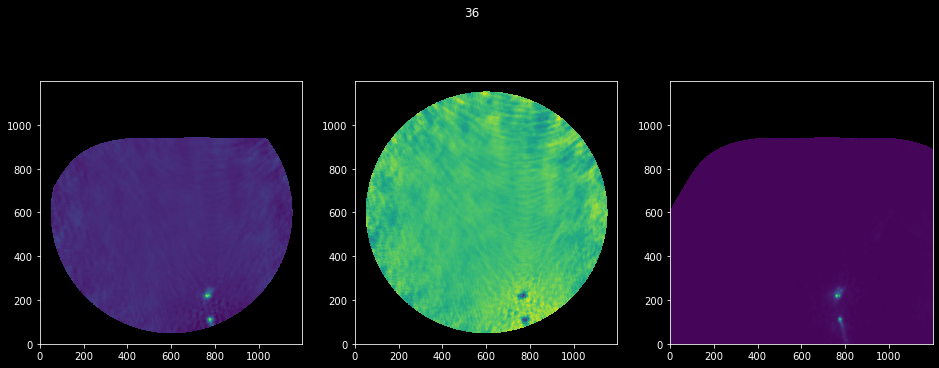

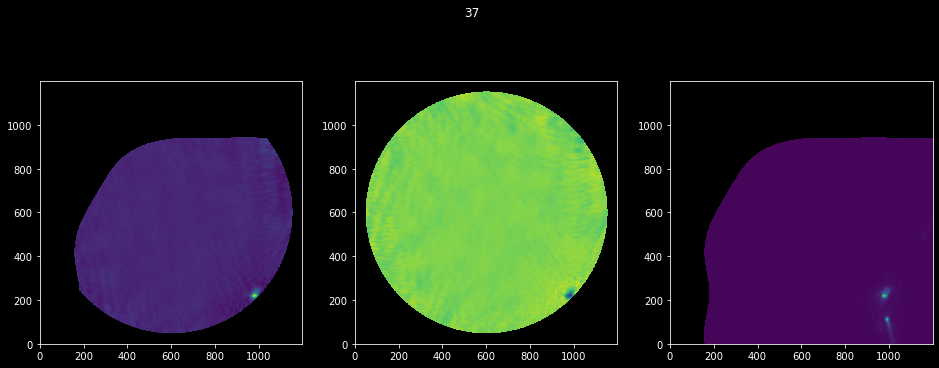

In [119]:
for fid in diff:
    pl.figure(figsize=(16,6))
    imagename_standard = f"{stdgrdpath}/W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field{fid}"

    img = SpectralCube.read(imagename_standard+".image.tt0.pbcor", format='casa_image')    
    
    pl.subplot(1,3,1).imshow(diff[fid])
    pl.subplot(1,3,2).imshow(img[0].value)
    reprj = finaliterim[0].reproject(img[0].header)
    pl.subplot(1,3,3).imshow(reprj.value)
    pl.suptitle(fid)


In [152]:
field=26
imagename_standard = f"{stdgrdpath}/W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field{field}_nopbdegrade"
os.system(f"rm -r {imagename_standard}*")

tclean(vis=msname,
       selectdata=True,
       field=str(field),
       spw="",
       timerange="",
       uvrange="",
       antenna=antennae,
       scan="",
       observation="",
       intent="",
       datacolumn="corrected",
       imagename=imagename_standard,
       imsize=[1200, 1200],
       #phasecenter="ICRS 290.9332327deg 14.50817819deg",
       cell=['0.06arcsec', '0.06arcsec'],
       stokes="I",projection="SIN",
       nchan=-1,start="",width="",outframe="LSRK",veltype="radio",
       gridder="standard",
       deconvolver="mtmfs",
       scales=[0, 3, 9],
       nterms=2,
       smallscalebias=0.6,
       restoration=True,
       pbcor=True,
       weighting="briggs",
       robust=0,
       niter=0,
       verbose=False,
       restart=True,
       savemodel="none",
       calcres=True,
       calcpsf=True,
       parallel=False)
os.system(f"rm -r {imagename_standard}.model.*")
os.system(f"rm -r {imagename_standard}.residual.*")
# immath(imagename='', mode='evalexpr', outfile='immath_results.im', expr='IM0', varnames='', sigma='0.0mJy/beam', polithresh='', mask='', region='', box='', chans='', stokes='', stretch=False, imagemd='', prec='float')
imregrid(imagename=finalmodelname[0]+".pbcor", template=imagename_standard+".image.tt0", output=imagename_standard+".model.tt0", overwrite=True)
imregrid(imagename=finalmodelname[1]+".pbcor", template=imagename_standard+".image.tt0", output=imagename_standard+".model.tt1", overwrite=True)
#immath(imagename=[imagename_standard+".pb.tt0", imagename_standard+"_finalmodel_proj_std.model.tt0.pbcor", ],           
#       expr="IM0 * IM1",
#       outfile=imagename+".model.tt0",
#       imagemd=imagename_standard+".image.tt0")
#immath(imagename=[imagename_standard+".pb.tt0", imagename_standard+"_finalmodel_proj_std.model.tt1.pbcor", ],
#       expr="IM0 * IM1",
#       outfile=imagename+".model.tt1",
#       imagemd=imagename_standard+".image.tt1")



ia.open(f"{imagename_standard}.image.tt0")
csi=ia.coordsys()
print(csi.torecord()['spectral2'])
ia.close()

ia.open(f"{imagename_standard}.model.tt0")
csm=ia.coordsys()
print(csm.torecord()['spectral2'])
ia.setcoordsys(csi.torecord())
ia.close()

ia.open(f"{imagename_standard}.model.tt1")
csm=ia.coordsys()
print(csm.torecord()['spectral2'])
ia.setcoordsys(csi.torecord())
ia.close()

os.system(f"rm -r {imagename_standard}.image.*")


tclean(vis=msname,
       selectdata=True,
       field=str(field),
       spw="",
       timerange="",
       uvrange="",
       antenna=antennae,
       scan="",
       observation="",
       intent="",
       datacolumn="corrected",
       imagename=imagename_standard,
       imsize=[1200, 1200],
       #phasecenter="ICRS 290.9332327deg 14.50817819deg",
       cell=['0.06arcsec', '0.06arcsec'],
       stokes="I",projection="SIN",
       nchan=-1,start="",width="",outframe="LSRK",veltype="radio",
       gridder="standard",
       deconvolver="mtmfs",
       scales=[0, 3, 9],
       nterms=2,
       smallscalebias=0.6,
       restoration=True,
       pbcor=True,
       weighting="briggs",
       robust=0,
       niter=0,
       verbose=False,
       restart=True,
       savemodel="none",
       calcres=True,
       calcpsf=True,
       parallel=False)

{'conversion': {'direction': {'m0': {'unit': 'rad', 'value': 0.0}, 'm1': {'unit': 'rad', 'value': 1.5707963267948966}, 'refer': 'J2000', 'type': 'direction'}, 'epoch': {'m0': {'unit': 'd', 'value': 0.0}, 'refer': 'LAST', 'type': 'epoch'}, 'position': {'m0': {'unit': 'rad', 'value': 0.0}, 'm1': {'unit': 'rad', 'value': 0.0}, 'm2': {'unit': 'm', 'value': 0.0}, 'refer': 'ITRF', 'type': 'position'}, 'system': 'LSRK'}, 'formatUnit': '', 'name': 'Frequency', 'nativeType': 0, 'restfreq': 216200000000.0, 'restfreqs': array([2.162e+11]), 'system': 'LSRK', 'unit': 'Hz', 'velType': 0, 'velUnit': 'km/s', 'version': 2, 'waveUnit': 'mm', 'wcs': {'cdelt': 16995929772.803253, 'crpix': 0.0, 'crval': 224541136065.8075, 'ctype': 'FREQ', 'pc': 1.0}}
{'conversion': {'direction': {'m0': {'unit': 'rad', 'value': 0.0}, 'm1': {'unit': 'rad', 'value': 1.5707963267948966}, 'refer': 'J2000', 'type': 'direction'}, 'epoch': {'m0': {'unit': 'd', 'value': 0.0}, 'refer': 'LAST', 'type': 'epoch'}, 'position': {'m0': {'

{}

In [150]:
field=26
imagename_standard = f"{stdgrdpath}/W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field{field}_nopbcor"
os.system(f"rm -r {imagename_standard}*")

tclean(vis=msname,
       selectdata=True,
       field=str(field),
       spw="",
       timerange="",
       uvrange="",
       antenna=antennae,
       scan="",
       observation="",
       intent="",
       datacolumn="corrected",
       imagename=imagename_standard,
       imsize=[1200, 1200],
       #phasecenter="ICRS 290.9332327deg 14.50817819deg",
       cell=['0.06arcsec', '0.06arcsec'],
       stokes="I",projection="SIN",
       nchan=-1,start="",width="",outframe="LSRK",veltype="radio",
       gridder="standard",
       deconvolver="mtmfs",
       scales=[0, 3, 9],
       nterms=2,
       smallscalebias=0.6,
       restoration=True,
       pbcor=True,
       weighting="briggs",
       robust=0,
       niter=0,
       verbose=False,
       restart=True,
       savemodel="none",
       calcres=True,
       calcpsf=True,
       parallel=False)
os.system(f"rm -r {imagename_standard}.model.*")
os.system(f"rm -r {imagename_standard}.residual.*")
# immath(imagename='', mode='evalexpr', outfile='immath_results.im', expr='IM0', varnames='', sigma='0.0mJy/beam', polithresh='', mask='', region='', box='', chans='', stokes='', stretch=False, imagemd='', prec='float')
imregrid(imagename=finalmodelname[0], template=imagename_standard+".image.tt0", output=imagename_standard+".model.tt0", overwrite=True)
imregrid(imagename=finalmodelname[1], template=imagename_standard+".image.tt0", output=imagename_standard+".model.tt1", overwrite=True)
#immath(imagename=[imagename_standard+".pb.tt0", imagename_standard+"_finalmodel_proj_std.model.tt0.pbcor", ],           
#       expr="IM0 * IM1",
#       outfile=imagename+".model.tt0",
#       imagemd=imagename_standard+".image.tt0")
#immath(imagename=[imagename_standard+".pb.tt0", imagename_standard+"_finalmodel_proj_std.model.tt1.pbcor", ],
#       expr="IM0 * IM1",
#       outfile=imagename+".model.tt1",
#       imagemd=imagename_standard+".image.tt1")



ia.open(f"{imagename_standard}.image.tt0")
csi=ia.coordsys()
print(csi.torecord()['spectral2'])
ia.close()

ia.open(f"{imagename_standard}.model.tt0")
csm=ia.coordsys()
print(csm.torecord()['spectral2'])
ia.setcoordsys(csi.torecord())
ia.close()

ia.open(f"{imagename_standard}.model.tt1")
csm=ia.coordsys()
print(csm.torecord()['spectral2'])
ia.setcoordsys(csi.torecord())
ia.close()


os.system(f"rm -r {imagename_standard}.image.*")


tclean(vis=msname,
       selectdata=True,
       field=str(field),
       spw="",
       timerange="",
       uvrange="",
       antenna=antennae,
       scan="",
       observation="",
       intent="",
       datacolumn="corrected",
       imagename=imagename_standard,
       imsize=[1200, 1200],
       #phasecenter="ICRS 290.9332327deg 14.50817819deg",
       cell=['0.06arcsec', '0.06arcsec'],
       stokes="I",projection="SIN",
       nchan=-1,start="",width="",outframe="LSRK",veltype="radio",
       gridder="standard",
       deconvolver="mtmfs",
       scales=[0, 3, 9],
       nterms=2,
       smallscalebias=0.6,
       restoration=True,
       pbcor=True,
       weighting="briggs",
       robust=0,
       niter=0,
       verbose=False,
       restart=True,
       savemodel="none",
       calcres=True,
       calcpsf=True,
       parallel=False)

{'conversion': {'direction': {'m0': {'unit': 'rad', 'value': 0.0}, 'm1': {'unit': 'rad', 'value': 1.5707963267948966}, 'refer': 'J2000', 'type': 'direction'}, 'epoch': {'m0': {'unit': 'd', 'value': 0.0}, 'refer': 'LAST', 'type': 'epoch'}, 'position': {'m0': {'unit': 'rad', 'value': 0.0}, 'm1': {'unit': 'rad', 'value': 0.0}, 'm2': {'unit': 'm', 'value': 0.0}, 'refer': 'ITRF', 'type': 'position'}, 'system': 'LSRK'}, 'formatUnit': '', 'name': 'Frequency', 'nativeType': 0, 'restfreq': 216200000000.0, 'restfreqs': array([2.162e+11]), 'system': 'LSRK', 'unit': 'Hz', 'velType': 0, 'velUnit': 'km/s', 'version': 2, 'waveUnit': 'mm', 'wcs': {'cdelt': 16995929772.803253, 'crpix': 0.0, 'crval': 224541136065.8075, 'ctype': 'FREQ', 'pc': 1.0}}
{'conversion': {'direction': {'m0': {'unit': 'rad', 'value': 0.0}, 'm1': {'unit': 'rad', 'value': 1.5707963267948966}, 'refer': 'J2000', 'type': 'direction'}, 'epoch': {'m0': {'unit': 'd', 'value': 0.0}, 'refer': 'LAST', 'type': 'epoch'}, 'position': {'m0': {'

{}

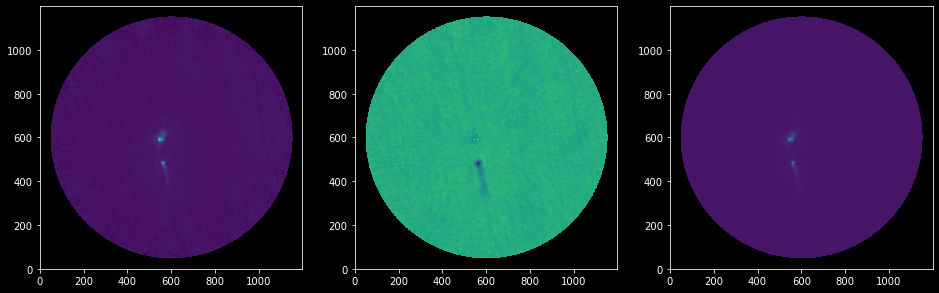

In [153]:
imagename_standard = f"{stdgrdpath}/W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field{field}"

img = SpectralCube.read(imagename_standard+".image.tt0.pbcor", format='casa_image')    
model = SpectralCube.read(imagename_standard+".model.tt0", format='casa_image')    
residual = SpectralCube.read(imagename_standard+".residual.tt0", format='casa_image')    

pl.subplot(1,3,1).imshow(img[0].value)
pl.subplot(1,3,2).imshow(residual[0].value)
pl.subplot(1,3,3).imshow(model[0].value)

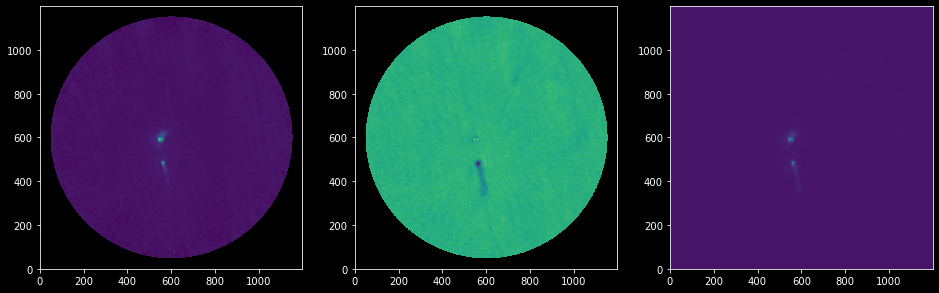

In [154]:
imagename_standard = f"{stdgrdpath}/W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field{field}_nopbcor"

img = SpectralCube.read(imagename_standard+".image.tt0.pbcor", format='casa_image')    
model = SpectralCube.read(imagename_standard+".model.tt0", format='casa_image')    
residual = SpectralCube.read(imagename_standard+".residual.tt0", format='casa_image')    

pl.subplot(1,3,1).imshow(img[0].value)
pl.subplot(1,3,2).imshow(residual[0].value)
pl.subplot(1,3,3).imshow(model[0].value)

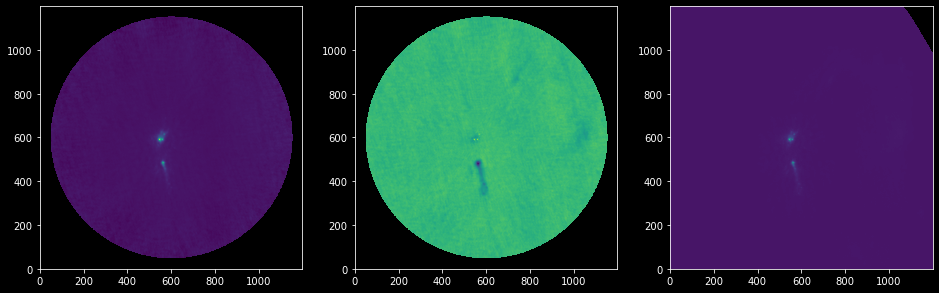

In [155]:
imagename_standard = f"{stdgrdpath}/W51-E_B6_uid___A001_X1296_X215_continuum_merged_12M_robust0_finalselfcal_standardgridder_center_field{field}_nopbdegrade"

img = SpectralCube.read(imagename_standard+".image.tt0.pbcor", format='casa_image')    
model = SpectralCube.read(imagename_standard+".model.tt0", format='casa_image')    
residual = SpectralCube.read(imagename_standard+".residual.tt0", format='casa_image')    

pl.subplot(1,3,1).imshow(img[0].value)
pl.subplot(1,3,2).imshow(residual[0].value)
pl.subplot(1,3,3).imshow(model[0].value)